<a href="https://colab.research.google.com/github/Coder240807/Data-analysis-/blob/main/Medical_Data_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/cardio_train.csv', sep=';')

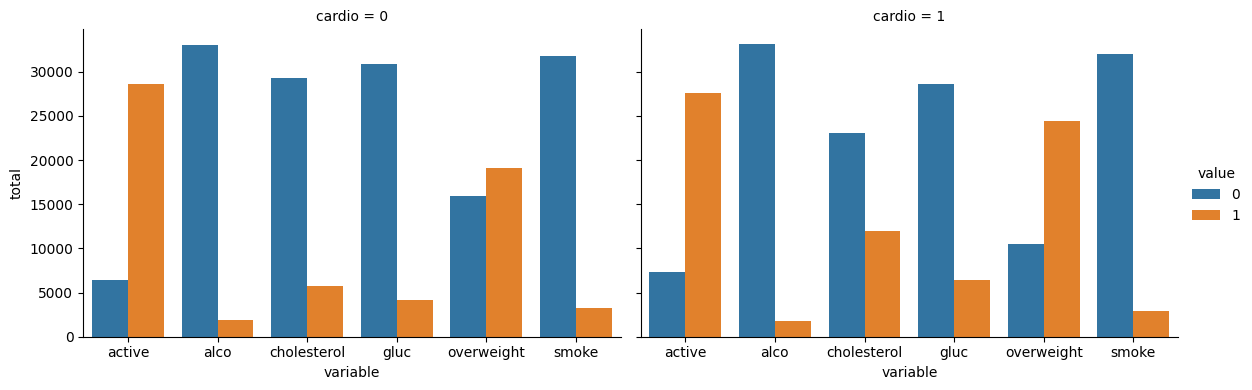

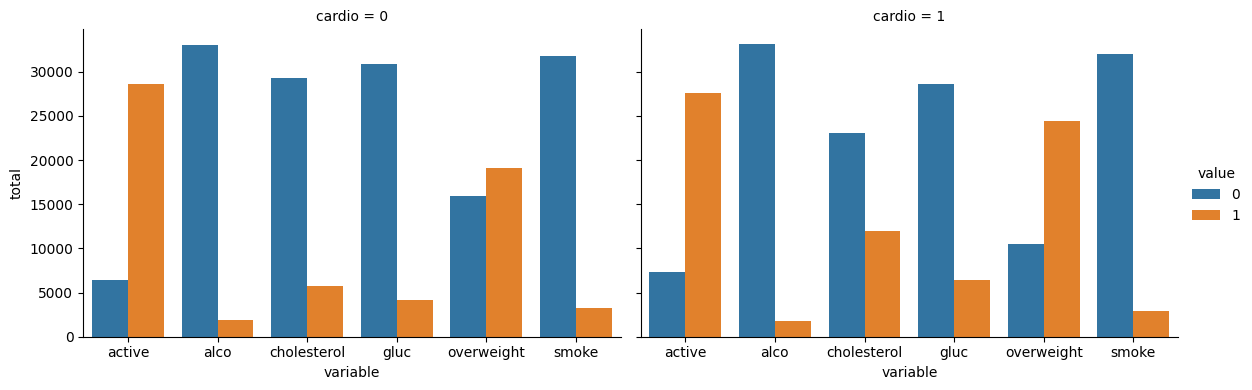

In [3]:

df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0)

df['cholesterol'] = (df['cholesterol'].apply(lambda x: 1 if x > 1 else 0))
df['gluc'] = (df['gluc'].apply(lambda x: 1 if x > 1 else 0))

def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'],
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat['total']=1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()
    fig = sns.catplot(data=df_cat, x='variable', y='total', hue='value', col='cardio',
                      kind='bar', height=4, aspect=1.5).fig
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()





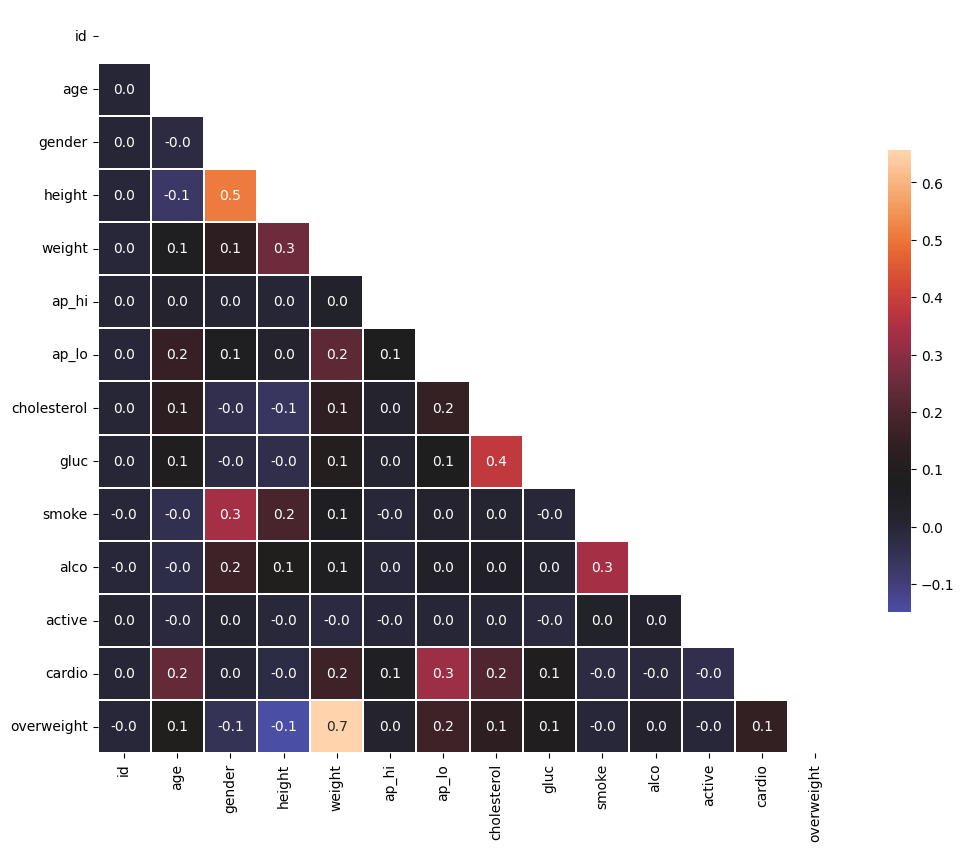

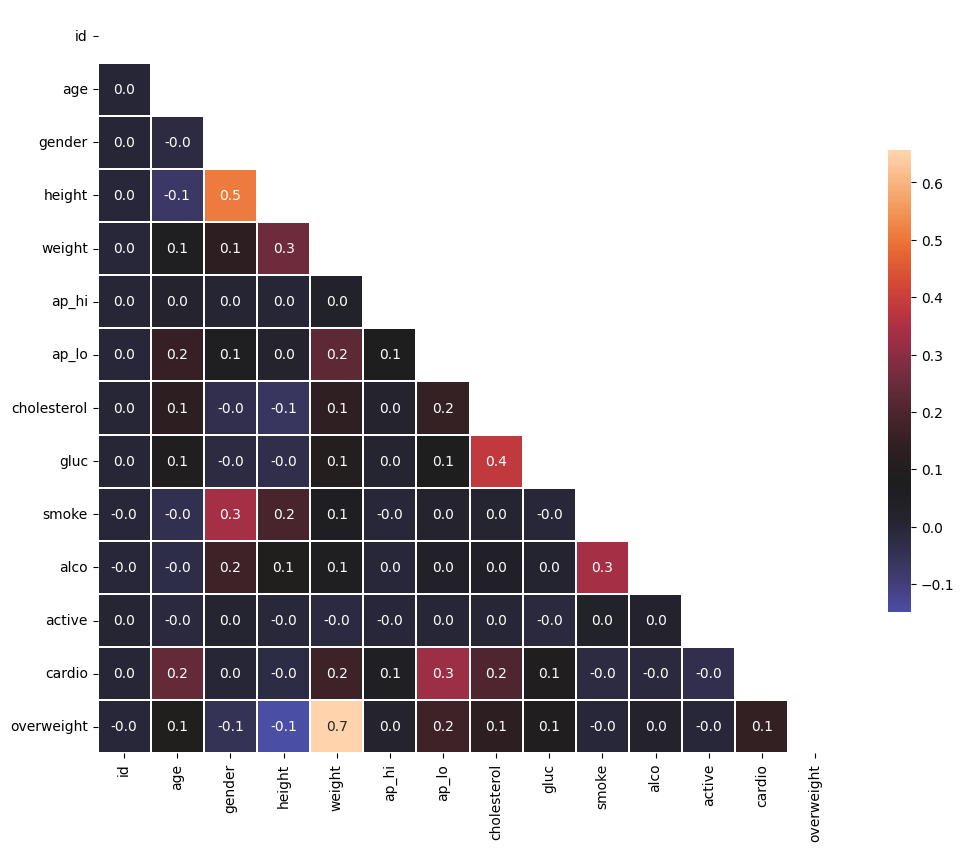

In [15]:
def draw_heat_map():
  df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
   (df['height'] >= df['height'].quantile(0.025)) &
   (df['height'] <= df['height'].quantile(0.975))  &
   (df['weight'] >= df['weight'].quantile(0.025)) &
   (df['weight'] <= df['weight'].quantile(0.975)) ]
  corr= df_heat.corr(method="pearson")
  mask= np.triu(corr)
  fig, ax = plt.subplots(figsize=(12, 12))
  sns.heatmap(corr, mask=mask, annot = True, fmt='.1f', center=0.08, cbar_kws={'shrink': 0.5},
               square=True, linewidths=0.05)
  fig.savefig('heatmap.png')
  return fig

draw_heat_map()




